# Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Восстановление золота из руды

# Техническое задание:

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание проекта:

Данные находятся в трёх файлах:
* gold_recovery_train_new.csv — обучающая выборка;
* gold_recovery_test_new.csv — тестовая выборка;
* gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

# Описание данных:

Технологический процесс:
* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant: 
 * Xanthate **— ксантогенат (промотер, или активатор флотации);
 * Sulphate — сульфат (на данном производстве сульфид натрия);
 * Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

Параметры этапов:
* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

Наименование признаков:

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока [тип_параметра]:
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

## Подготовка данных

### Откроем файлы и изучим их.

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
print('df_train:')
df_train.info()
print('-'*80)
print('df_test:')
df_test.info()
print('-'*80)
print('df_full:')
df_full.info()

df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null

In [4]:
print('Пропуски в данных (в процентах):')
print()
print('df_train:')
print((df_train.drop(df_train.dropna(axis=1).columns, axis=1)
       .isna().mean()*100).sort_values(ascending=False))
print('-'*60)
print('df_test:')
print((df_test.drop(df_test.dropna(axis=1).columns, axis=1)
       .isna().mean()*100).sort_values(ascending=False))
print('-'*60)
print('df_full:')
print((df_full.drop(df_full.dropna(axis=1).columns, axis=1)
       .isna().mean()*100).sort_values(ascending=False))

Пропуски в данных (в процентах):

df_train:
secondary_cleaner.output.tail_sol             11.343558
rougher.state.floatbank10_e_air                3.081490
rougher.input.floatbank11_xanthate             3.024949
primary_cleaner.output.concentrate_sol         2.021344
secondary_cleaner.state.floatbank2_a_air       1.533677
                                                ...    
rougher.state.floatbank10_a_air                0.007068
rougher.state.floatbank10_a_level              0.007068
rougher.state.floatbank10_b_air                0.007068
rougher.state.floatbank10_b_level              0.007068
secondary_cleaner.state.floatbank6_a_level     0.007068
Length: 62, dtype: float64
------------------------------------------------------------
df_test:
rougher.input.floatbank11_xanthate          0.472590
rougher.input.feed_sol                      0.396975
secondary_cleaner.state.floatbank3_a_air    0.170132
rougher.input.floatbank11_sulfate           0.151229
primary_cleaner.input.depressan

В данных есть пропуски, а в df_test отсутсвует 34 столбца.

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между нашими расчётами и значением признака. Опишем выводы.

Эффективность обогащения рассчитывается по формуле

recovery = ((С * (F - T)) / (F * (C - T))) * 100%

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [5]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

recovery = ((C * (F - T)) / (F * (C - T))) * 100
MAE = (abs(recovery - df_train['rougher.output.recovery'])).sum()/len(recovery)
print('MAE между нашими расчётами и значением признака rougher.output.recovery =', MAE)

MAE между нашими расчётами и значением признака rougher.output.recovery = 9.73512347450521e-15


MAE между нашими расчётами и значением признака rougher.output.recovery ничтожно мала, что даёт основание считать: в данных эффективность обогащения recovery рассчитана правильно.

### Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [6]:
print('Признаки, недоступные в тестовой выборке:')
list(df_full.columns[~(df_full.columns.isin(df_test.columns))])

Признаки, недоступные в тестовой выборке:


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В df_test отсутсвуют все параметры принадлежащие типу output и типу calculation. Т.е. присутствуют вводные параметры сырья и параметры, характеризующие текущее состояние этапа, но отсутствуют параметры выходящего продукта и расчётные характеристики. Тестовая выборка составлена только из данных с параметрами добычи и очистки, что предполагает обучение модели только на этих данных, поскольку остальные данные являются результатом обработки и неизвестны до запуска предприятия.

Зафиксируем список признаков для обучения в educational_columns, исключив идентификационный признак date.

In [7]:
educational_columns = df_test.columns.drop('date')

###  Проведём предобработку данных.

In [8]:
print('Количество уникальных значений df_full[\'date\']:', len(df_full['date'].unique()))
print('Количество строк df_full                       ', len(df_full))

Количество уникальных значений df_full['date']: 19439
Количество строк df_full                        19439


Каждое значение date является уникальным, а из описания проекта следует, что соседние по времени параметры часто похожи. Для заполнения пропусков близкими по времени значениями воспользуемся методом ffill, а недостающие признаки в df_test добавим из df_full.

In [9]:
df_full = df_full.sort_values(by='date').ffill()
df_train = df_train[['date']].merge(df_full, on='date', how='left')
df_test = df_test[['date']].merge(df_full, on='date', how='left')

print('Количество пропусков в df_train:', df_train.isna().sum().sum())
print('Количество пропусков в df_test:', df_test.isna().sum().sum())
print('Количество пропусков в df_full:', df_full.isna().sum().sum())

Количество пропусков в df_train: 0
Количество пропусков в df_test: 0
Количество пропусков в df_full: 0


## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишем выводы.

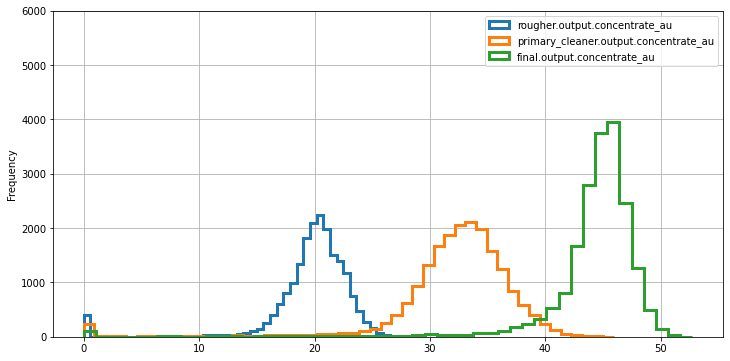

In [10]:
ax = df_full.plot(kind='hist',
                  y='rougher.output.concentrate_au',
                  histtype='step',
                  ylim=(0, 6000),
                  figsize=(12, 6),
                  bins=50,
                  linewidth=3,
                  alpha=1,
                  label='rougher.output.concentrate_au',
                  legend=True)
df_full.plot(kind='hist',
             y='primary_cleaner.output.concentrate_au',
             histtype='step',
             figsize=(12, 6),
             bins=50,
             linewidth=3,
             alpha=1,
             label='primary_cleaner.output.concentrate_au',
             ax=ax)
df_full.plot(kind='hist',
             y='final.output.concentrate_au',
             histtype='step',
             bins=50,
             linewidth=3,
             alpha=1,
             label='final.output.concentrate_au',
             ax=ax,
             grid=True)
plt.show()

Концентрация au с каждым этапом обработки увеличивается и достигает максимума после финального этапа. Накждом этапе присутствуют концентраты с нулевым содержанием au. Количество таких концентратов уменьшается после каждого этапа обработки.

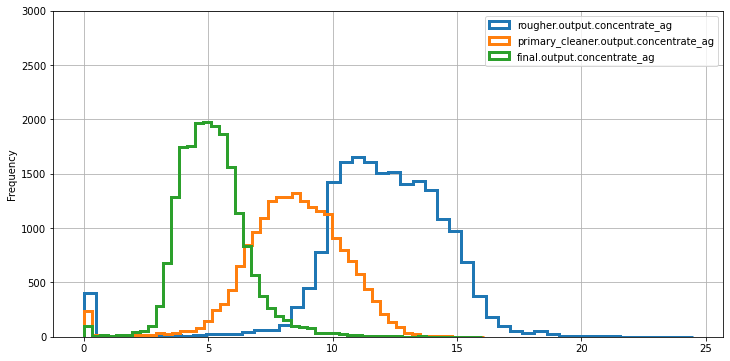

In [11]:
ax = df_full.plot(kind='hist',
                  y='rougher.output.concentrate_ag',
                  histtype='step',
                  ylim=(0, 3000),
                  figsize=(12, 6),
                  bins=50,
                  linewidth=3,
                  alpha=1,
                  label='rougher.output.concentrate_ag',
                  legend=True)
df_full.plot(kind='hist',
             y='primary_cleaner.output.concentrate_ag',
             histtype='step',
             figsize=(12, 6),
             bins=50,
             linewidth=3,
             alpha=1,
             label='primary_cleaner.output.concentrate_ag',
             ax=ax)
df_full.plot(kind='hist',
             y='final.output.concentrate_ag',
             histtype='step',
             bins=50,
             linewidth=3,
             alpha=1,
             label='final.output.concentrate_ag',
             ax=ax,
             grid=True)
plt.show()

Концентрация ag с каждым этапом обработки уменьшается и достигает минимума после финального этапа. Накждом этапе присутствуют концентраты с нулевым содержанием ag. Количество таких концентратов уменьшается после каждого этапа обработки.

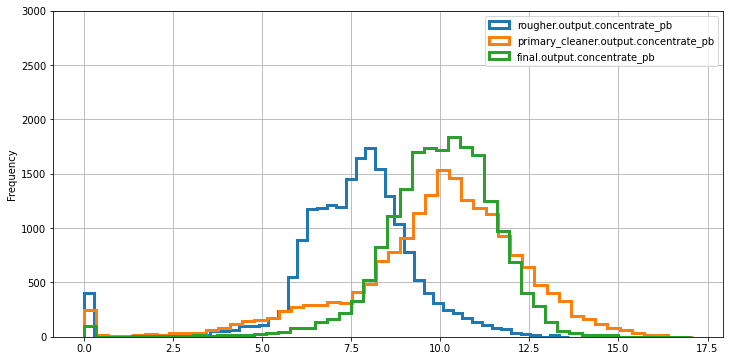

In [12]:
ax = df_full.plot(kind='hist',
                  y='rougher.output.concentrate_pb',
                  histtype='step',
                  ylim=(0, 3000),
                  figsize=(12, 6),
                  bins=50,
                  linewidth=3,
                  alpha=1,
                  label='rougher.output.concentrate_pb',
                  legend=True)
df_full.plot(kind='hist',
             y='primary_cleaner.output.concentrate_pb',
             histtype='step',
             figsize=(12, 6),
             bins=50,
             linewidth=3,
             alpha=1,
             label='primary_cleaner.output.concentrate_pb',
             ax=ax)
df_full.plot(kind='hist',
             y='final.output.concentrate_pb',
             histtype='step',
             bins=50,
             linewidth=3,
             alpha=1,
             label='final.output.concentrate_pb',
             ax=ax,
             grid=True)
plt.show()

После первого этапа обработки содержание pb в концентрате немного увеличивается. Затем содержание остаётся на прежнем уровне, но при этом количество средних значений снижается, а количество значений смещёных к максимальным и минимальным - увеличивается: распределение растёт. Накждом этапе присутствуют концентраты с нулевым содержанием pb. Количество таких концентратов уменьшается после каждого этапа обработки.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

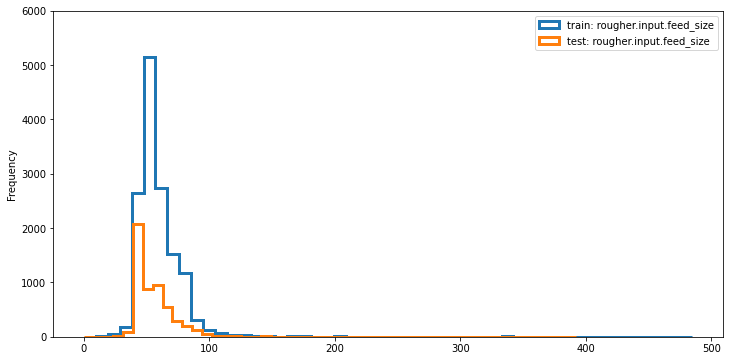

In [244]:
ax = df_train.plot(kind='hist',
                  y='rougher.input.feed_size',
                  histtype='step',
                  ylim=(0, 6000),
                  figsize=(12, 6),
                  bins=50,
                  linewidth=3,
                  alpha=1,
                  label='train: rougher.input.feed_size',
                  legend=True)
df_test.plot(kind='hist',
             y='rougher.input.feed_size',
             histtype='step',
             figsize=(12, 6),
             bins=50,
             linewidth=3,
             alpha=1,
             label='test: rougher.input.feed_size',
             ax=ax)
plt.show()

In [245]:
print('Отношение средних значений размеров гранул:')
(df_train['rougher.input.feed_size'].mean() / 
df_test['rougher.input.feed_size'].mean())

Отношение средних значений размеров гранул:


1.0766200348502637

In [246]:
print('Отношение медианных значений размеров гранул:')
(df_train['rougher.input.feed_size'].median() / 
df_test['rougher.input.feed_size'].median())

Отношение медианных значений размеров гранул:


1.0869855522110683

Распределения размеров гранул сырья на обучающей и тестовой выборках находятся в одинаковых диапазонах, динамика распределения схожа. Средние и медианные значения почти равны (отношение медианных и средних значений размеров гранул близки к еденице). Распределения не сильно отличаются друг от друга, оценка модели будет правильной.

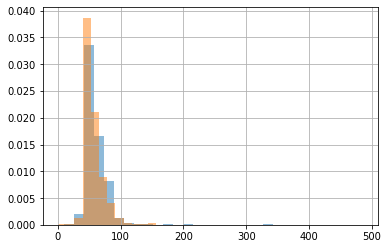

In [26]:
df_train['rougher.input.feed_size'].hist(density=True, bins=30, alpha=.5)
df_test['rougher.input.feed_size'].hist(density=True, bins=30, alpha=.5)
plt.show()

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Присвоим значения суммарных концентраций каждой партии сырья.

In [247]:
df_full['rougher.output.concentrate_total'] = (
    df_full[['rougher.output.concentrate_au',
            'rougher.output.concentrate_ag',
            'rougher.output.concentrate_pb',
            'rougher.output.concentrate_sol']].sum(axis=1)
)

In [248]:
df_full['primary_cleaner.output.concentrate_total'] = (
    df_full[['primary_cleaner.output.concentrate_au',
            'primary_cleaner.output.concentrate_ag',
            'primary_cleaner.output.concentrate_pb',
            'primary_cleaner.output.concentrate_sol']].sum(axis=1)
)

In [249]:
df_full['final.output.concentrate_total'] = (
    df_full[['final.output.concentrate_au',
            'final.output.concentrate_ag',
            'final.output.concentrate_pb',
            'final.output.concentrate_sol']].sum(axis=1)
)

In [250]:
print('Количество значений df_full[\'rougher.output.concentrate_total\'] равных \"0\"]:', 
len(df_full[df_full['rougher.output.concentrate_total'] == 0]))

print('Количество значений df_full[\'primary_cleaner.output.concentrate_total\'] равных \"0\"]:', 
len(df_full[df_full['primary_cleaner.output.concentrate_total'] == 0]))

print('Количество значений df_full[\'final.output.concentrate_total\'] равных \"0\"]:', 
len(df_full[df_full['final.output.concentrate_total'] == 0]))

Количество значений df_full['rougher.output.concentrate_total'] равных "0"]: 394
Количество значений df_full['primary_cleaner.output.concentrate_total'] равных "0"]: 108
Количество значений df_full['final.output.concentrate_total'] равных "0"]: 98


In [251]:
print('Количество партий с концентрацией веществ равной "0" после финальной обработки,')
print('так же имеющие концентрацию веществ равной "0" в исходном сырье:')

len(df_full[(df_full['final.output.concentrate_total'] == 0) &
    (df_full['rougher.output.concentrate_total'] == 0)])

Количество партий с концентрацией веществ равной "0" после финальной обработки,
так же имеющие концентрацию веществ равной "0" в исходном сырье:


2

Среди суммарных концентраций всех веществ на разных стадиях присутствуют значения равные "0".

Логично утверждать, что в партиях с концентрацией равной "0" в поступающем сырье, после финальной обработки концентрация так же должна быть равна "0" по условиям технологического процесса. Значит после финальной стадии обработки количество партий с концентрацией веществ равной "0" может быть не меньше, чем количество партий с концентрацией веществ равной "0" в поступающем сырье. Учитывая, что это не так, а почти все партии имеющие в финальной стадии концентрацию равную "0" в начальном сырье имели концентрацию не равную "0", партии с концентрацией веществ на любой стадии равной "0" признаем выбросами и исключим их из таблиц.

In [252]:
drop_date = (
    df_full[(df_full['rougher.output.concentrate_total'] == 0) |
           (df_full['primary_cleaner.output.concentrate_total'] == 0) |
           (df_full['final.output.concentrate_total'] == 0)]['date']
)

df_full = df_full[~df_full['date'].isin(drop_date)].reset_index(drop=True)
df_train = df_train[~df_train['date'].isin(drop_date)].reset_index(drop=True)
df_test = df_test[~df_test['date'].isin(drop_date)].reset_index(drop=True)

df_full.info()
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18848 entries, 0 to 18847
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                18848 non-null  object 
 1   final.output.concentrate_ag                         18848 non-null  float64
 2   final.output.concentrate_pb                         18848 non-null  float64
 3   final.output.concentrate_sol                        18848 non-null  float64
 4   final.output.concentrate_au                         18848 non-null  float64
 5   final.output.recovery                               18848 non-null  float64
 6   final.output.tail_ag                                18848 non-null  float64
 7   final.output.tail_pb                                18848 non-null  float64
 8   final.output.tail_sol                               18848 non-null  float64


Данные подготовлены для построения модели.

## Модель

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика sMAPE вычисляется так:

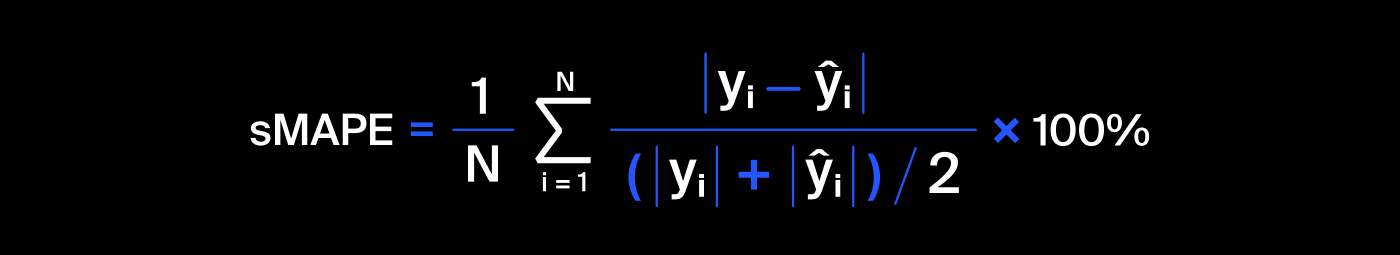

Обозначения:

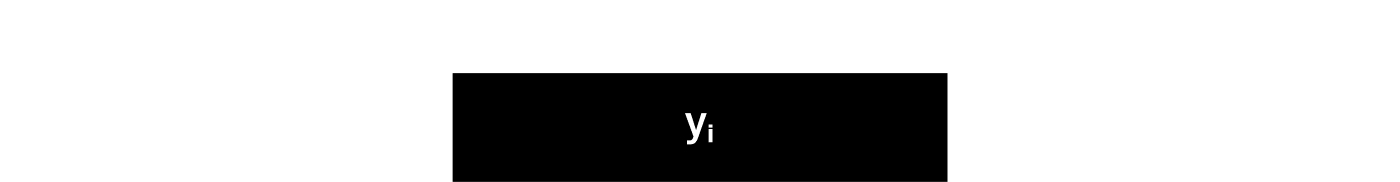

Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.

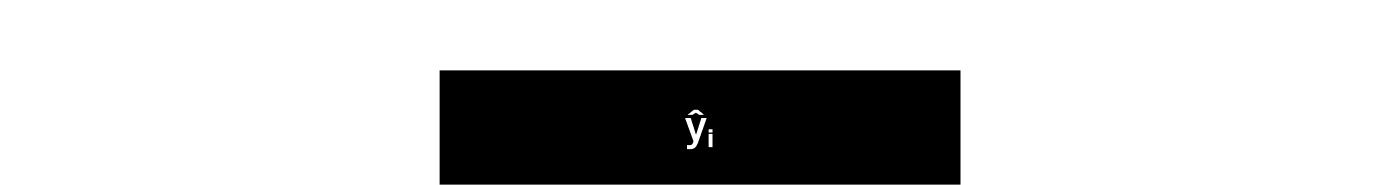

Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.

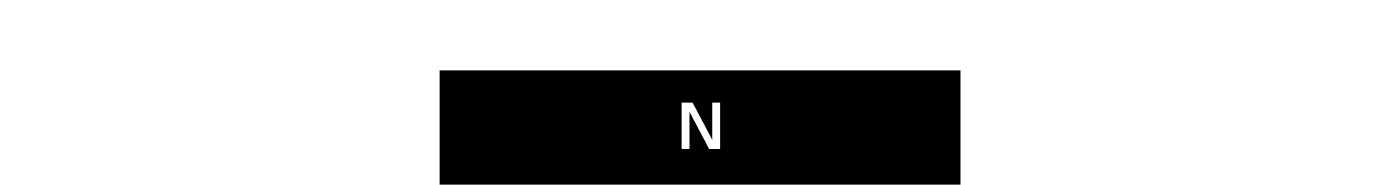

Количество объектов в выборке.

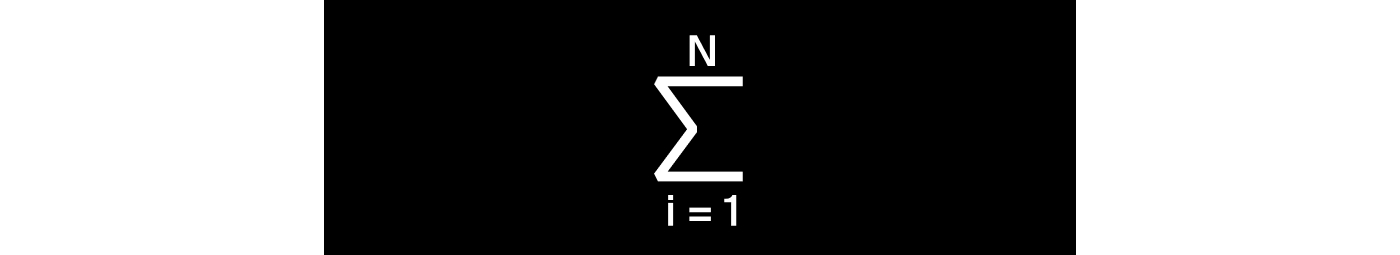

Суммирование по всем объектам выборки (i меняется от 1 до N).

Нужно спрогнозировать сразу две величины:
* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:

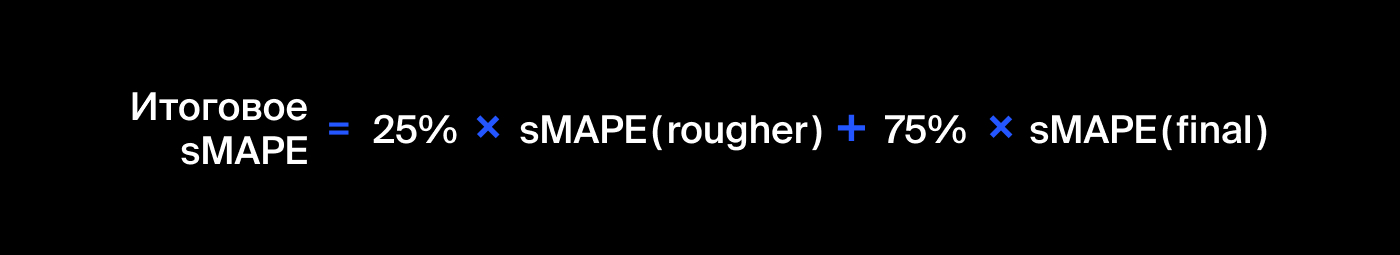

### Функция для вычисления итоговой sMAPE

In [253]:
def result_sMAPE(target_rougher, predict_rougher, target_final, predict_final):
    sMAPE_rougher = (
        (abs(target_rougher - predict_rougher) /
        ((abs(target_rougher) + abs(predict_rougher)) / 2)
    ).sum() / len(target_rougher)) * 100
    
    sMAPE_final = (
        (abs(target_final - predict_final) /
        ((abs(target_final) + abs(predict_final)) / 2)
    ).sum() / len(target_final)) * 100
    
    return (.25 * sMAPE_rougher) + (.75 * sMAPE_final)

### Функция для кросс-валидации

In [254]:
def cross_validation(model, divider):
    scores = []
    sample_size = int(len(df_train)/divider)
    
    for i in range(0, len(df_train), sample_size):
        m = i + sample_size
        if m > len(df_train):
            m = len(df_train)
        valid_indexes = range(i, m)
        train_indexes = df_train.index.drop(valid_indexes)
        features_train = df_train[educational_columns].loc[train_indexes]
        target_train = df_train['rougher.output.recovery'].loc[train_indexes]
        features_valid = df_train[educational_columns].loc[valid_indexes]
        target_rougher = df_train['rougher.output.recovery'].loc[valid_indexes]
        
        scaler.fit(features_train)
        features_train[features_train.columns] = scaler.transform(features_train[features_train.columns])
        features_valid[features_valid.columns] = scaler.transform(features_valid[features_valid.columns])
        
        model.fit(features_train, target_train)
        predict_rougher = model.predict(features_valid)
        
        target_train = df_train['final.output.recovery'].loc[train_indexes]
        target_final = df_train['final.output.recovery'].loc[valid_indexes]
        
        model.fit(features_train, target_train)
        predict_final = model.predict(features_valid)
        
        score = result_sMAPE(
            target_rougher, predict_rougher,
            target_final, predict_final
        )
        
        scores.append(score)
    final_score = pd.Series(scores).mean()
    return final_score

In [27]:
from sklearn.model_selection import cross_val_score

### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверем её на тестовой выборке.

Наименьшее отклонение sMAPE определит наилучшую модель.

#### модель LinearRegression

In [259]:
model = LinearRegression()
print('Модель - LinearRegression.')
print('-'*50)

final_score = cross_validation(model, 7)
print('Средняя оценка качества модели result_sMAPE:', final_score.round(2), '%')

Модель - LinearRegression.
--------------------------------------------------
Средняя оценка качества модели result_sMAPE: 9.09 %


#### модель DecisionTreeRegressor

In [260]:
print('Модель - DecisionTreeRegressor.')
print('-'*50)

best_result = 10000
best_depth = 0

for depth in range(1, 10):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    
    final_score = cross_validation(model, 7)
    print('\"Глубина дерева\":', depth, ', result_sMAPE:', final_score.round(2), '%')
    
    if final_score < best_result:
        best_result = final_score
        best_depth = depth
print('-'*50)
print("Наилучший параметр \"Глубина дерева\" для модели:", best_depth)
print('Наилучшая средняя оценка качества модели result_sMAPE:', best_result.round(2), '%')

Модель - DecisionTreeRegressor.
--------------------------------------------------
"Глубина дерева": 1 , result_sMAPE: 8.78 %
"Глубина дерева": 2 , result_sMAPE: 8.46 %
"Глубина дерева": 3 , result_sMAPE: 8.24 %
"Глубина дерева": 4 , result_sMAPE: 8.24 %
"Глубина дерева": 5 , result_sMAPE: 8.18 %
"Глубина дерева": 6 , result_sMAPE: 8.33 %
"Глубина дерева": 7 , result_sMAPE: 9.4 %
"Глубина дерева": 8 , result_sMAPE: 9.67 %
"Глубина дерева": 9 , result_sMAPE: 9.56 %
--------------------------------------------------
Наилучший параметр "Глубина дерева" для модели: 5
Наилучшая средняя оценка качества модели result_sMAPE: 8.18 %


#### Модель RandomForestRegressor

In [261]:
print('Модель - RandomForestRegressor.')
print('-'*70)

best_result = 10000
best_est = 0
best_depth = 0

for est in range(10, 31, 10):
    for depth in range(1, 10):
        model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=est)
        
        final_score = cross_validation(model, 7)

        print('\"Количество деревьев\":', est, ', \"Глубина дерева\":', depth, ', result_sMAPE:', final_score.round(2), '%')
        
        if final_score < best_result:
            best_result = final_score
            best_est = est
            best_depth = depth
            
print('-'*70)
print("Наилучший параметр \"Количество деревьев\" для модели:", best_est)
print("Наилучший параметр \"Глубина дерева\" для модели:", best_depth)
print('Наилучшая средняя оценка качества модели result_sMAPE:', best_result.round(2), '%')

Модель - RandomForestRegressor.
----------------------------------------------------------------------
"Количество деревьев": 10 , "Глубина дерева": 1 , result_sMAPE: 8.7 %
"Количество деревьев": 10 , "Глубина дерева": 2 , result_sMAPE: 8.28 %
"Количество деревьев": 10 , "Глубина дерева": 3 , result_sMAPE: 7.97 %
"Количество деревьев": 10 , "Глубина дерева": 4 , result_sMAPE: 7.96 %
"Количество деревьев": 10 , "Глубина дерева": 5 , result_sMAPE: 7.69 %
"Количество деревьев": 10 , "Глубина дерева": 6 , result_sMAPE: 7.61 %
"Количество деревьев": 10 , "Глубина дерева": 7 , result_sMAPE: 7.81 %
"Количество деревьев": 10 , "Глубина дерева": 8 , result_sMAPE: 8.18 %
"Количество деревьев": 10 , "Глубина дерева": 9 , result_sMAPE: 8.27 %
"Количество деревьев": 20 , "Глубина дерева": 1 , result_sMAPE: 8.73 %
"Количество деревьев": 20 , "Глубина дерева": 2 , result_sMAPE: 8.28 %
"Количество деревьев": 20 , "Глубина дерева": 3 , result_sMAPE: 7.92 %
"Количество деревьев": 20 , "Глубина дерева": 

# Наилучшая модель:

RandomForestRegressor(random_state=12345, max_depth=6, n_estimators=10)

In [262]:
# Там, ниже, что-то всё "порозовело", поэтому:
import warnings
warnings.filterwarnings('ignore')

In [268]:
model = RandomForestRegressor(random_state=12345, max_depth=6, n_estimators=10)
print('RandomForestRegressor(random_state=12345, max_depth=6, n_estimators=10).')
print('-'*70)

features_train = df_train[educational_columns]
target_train = df_train['rougher.output.recovery']
features_valid = df_test[educational_columns]
target_rougher = df_test['rougher.output.recovery']

scaler.fit(features_train)
features_train[features_train.columns] = scaler.transform(features_train[features_train.columns])
features_valid[features_valid.columns] = scaler.transform(features_valid[features_valid.columns])

model.fit(features_train, target_train)
predict_rougher = model.predict(features_valid)

target_train = df_train['final.output.recovery']
target_final = df_test['final.output.recovery']

model.fit(features_train, target_train)
predict_final = model.predict(features_valid)

score = result_sMAPE(
    target_rougher, predict_rougher,
    target_final, predict_final
)

print('Оценка качества result_sMAPE на тестовой выборке:', score.round(2), '%')

RandomForestRegressor(random_state=12345, max_depth=6, n_estimators=10).
----------------------------------------------------------------------
Оценка качества result_sMAPE на тестовой выборке: 7.31 %


## Вывод

Наилучшие результаты показала модель RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=10).

На тестовой выборке result_sMAPE: 7.31 %